In [ ]:
import sys
sys.path.append("..")
from importlib import reload
import helper_visa as vs
import time
import joblib
from pylab import *
reload(vs)


<module 'visa_helper' from 'C:\\Users\\mathusla\\Documents\\MATHUSLA\\JupyterNotebooks\\Keysight\\visa_helper.py'>

# Step 1: connect to the scope
- If you don't know the address, do vs.connect()
- Otherwise, put the address in the argument will speed it up

In [4]:
scope = vs.connect(address = "TCPIP0::10.0.0.4::inst0::INSTR", timeout=30_000) # set 30 second

Connected to VISA [TCPIP0::10.0.0.4::inst0::INSTR]:  KEYSIGHT TECHNOLOGIES,EXR054A,MY63160110,11.50.00201



# Example 1: read the current waveform from the scope

- For simplicity of the code and better readout speed, please configure the trigger threshold and channel setup on the scope

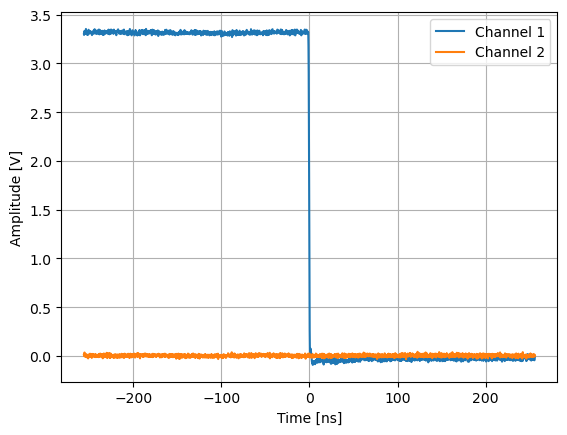

In [305]:
trigger_channel = 1
read_channel = [1,2]
acquire_length = 4096

data,time_series=vs.read_waveform(scope, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True, initialize = True, calibration_data=None)

for ch in data:
    plot(time_series*1e9, data[ch], label=f"Channel {ch}")

# xlim(-10,10)
xlabel("Time [ns]")
ylabel("Amplitude [V]")
legend()
grid()

# Example 2: repetitively read multiple waveforms from the scope

- For simplicity of the code and better readout speed, please configure the trigger threshold and channel setup on the scope

In [304]:
data_save = vs.get_events(scope, Nevents = 100, print_every_n = 20, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
time_series = data_save["metadata"]["time_series"]*1e9

joblib.dump(data_save, "scope_waveform_save_example.joblib",compress =False)

20/100 events acquired, time elapsed 0.5 s, time from last print 0.5 s
40/100 events acquired, time elapsed 1.0 s, time from last print 0.5 s
60/100 events acquired, time elapsed 1.5 s, time from last print 0.5 s
80/100 events acquired, time elapsed 2.0 s, time from last print 0.5 s
100/100 events acquired, time elapsed 2.5 s, time from last print 0.5 s


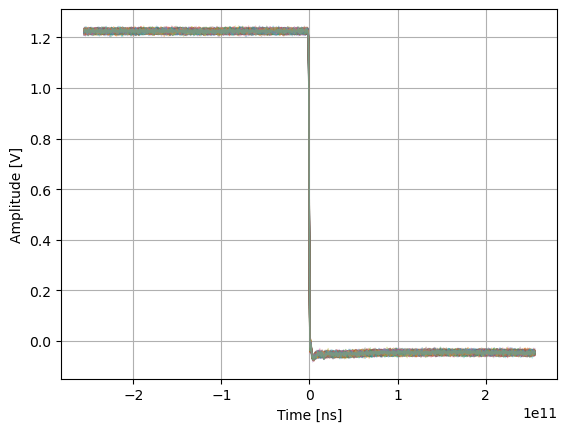

In [304]:
for i in range(len(data_save[1])):
    plot(time_series, data_save[1][i],alpha=0.3, linewidth=1)

# xlim(-10,10)
xlabel("Time [ns]")
ylabel("Amplitude [V]")
grid()